Perceptron - modelo linear para classificação binária


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [57]:
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)

In [58]:
# Visualizacao 3 primeiros
X_iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [59]:
# Selecao das duas colunas de petala e targets (valor que queremos prever) igual a 0 e 1
X = X_iris.loc[y_iris.isin([0,1]),['petal length (cm)','petal width (cm)']]
y = y_iris.loc[y_iris.isin([0,1])]

In [60]:
y.value_counts()

target
0    50
1    50
Name: count, dtype: int64

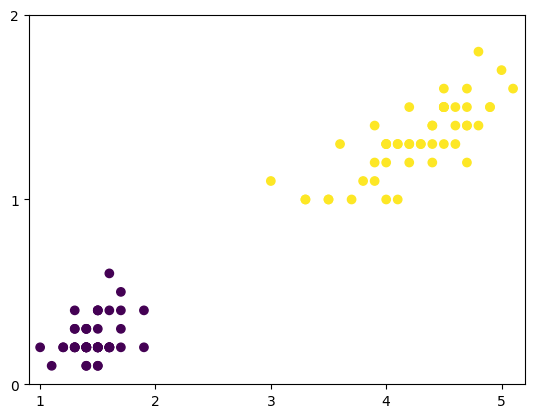

In [61]:
fig,ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

ax.set(xlim=(0.9, 5.2), xticks=[1,2,3,4,5],
       ylim=(0,2), yticks=[0,1,2])

plt.show()

Classe linearmente separaveis, uma linha separa as duas classes no grafico

eixo x - petal_length
eixo y = petal_width

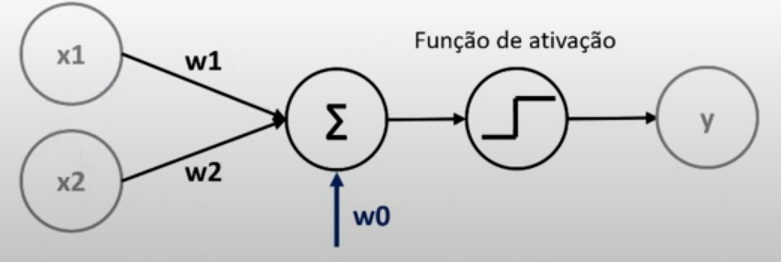

In [62]:
# Separando database em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.linear_model import Perceptron

In [64]:
# Criacao do classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [65]:
clf = clf.fit(X_train, y_train)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]])

In [69]:
# Verificar os pesos
clf.coef_

array([[0.08, 0.08]])

In [70]:
# Verificando o vies
clf.intercept_

array([-0.2])

In [71]:
w1 = round(clf.coef_[0][0], 2)
w2 = round(clf.coef_[0][1], 2)
w0 = clf.intercept_[0]
print(w1,w2,w0)

0.08 0.08 -0.2


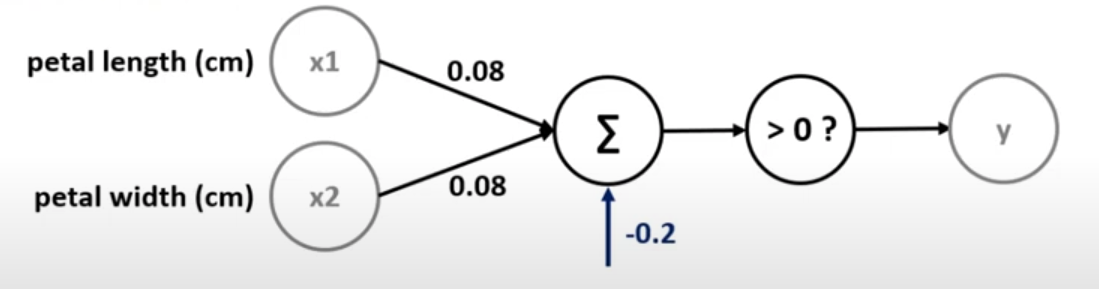

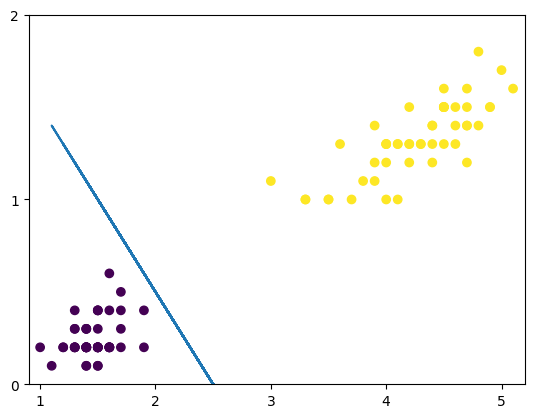

In [72]:
# Visualizacao grafica da reta gerada pelo Perceptron da classifiicacao linear

fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
ax.plot(X_train.iloc[:,0], (-w1*X_train.iloc[:,0]-w0)/w2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)

ax.set(xlim=(0.9, 5.2), xticks=[1,2,3,4,5],
       ylim=(0,2), yticks=[0,1,2])

plt.show()

Classes 1 e 2 nao sao separaveis linearmente

In [73]:
X = X_iris.loc[y_iris.isin([1,2]),['petal length (cm)','petal width (cm)']]
y = y_iris.loc[y_iris.isin([1,2])]

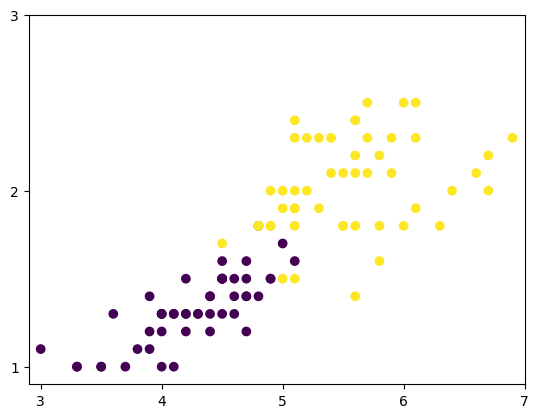

In [74]:
fig,ax = plt.subplots()

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9,3), yticks=[1,2,3])

plt.show()

In [75]:
# Separando database em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
# Criacao do classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [77]:
clf = clf.fit(X_train, y_train)

In [78]:
y_pred = clf.predict(X_test)

In [79]:
confusion_matrix(y_pred, y_test)

array([[19,  2],
       [ 0, 12]])

In [80]:
w1 = round(clf.coef_[0][0], 2)
w2 = round(clf.coef_[0][1], 2)
w0 = clf.intercept_[0]
print(w1,w2,w0)

-0.24 3.07 -3.800000000000002


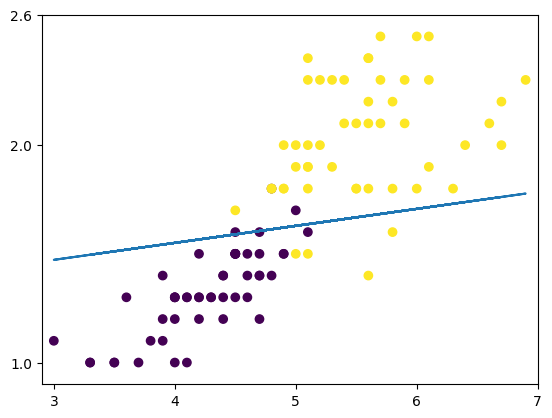

In [81]:
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train)
ax.plot(X_train.iloc[:,0], (-w1*X_train.iloc[:,0]-w0)/w2)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)

ax.set(xlim=(2.9, 7), xticks=[3,4,5,6,7],
       ylim=(0.9,2.6), yticks=[1,2,2.6])

plt.show()

Não é possível separar totalmente os dados, eles não são linearmente separáveis

Resultado na confusion matrix -> 2 foram previstos incorretamente

Solução: criação de redes neurais com varias camadas de Perceptrons

Perceptron - Problema OR e XOR 

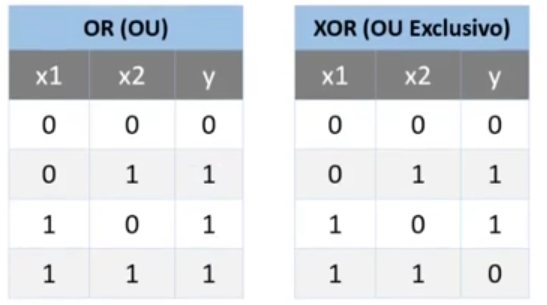

In [106]:
dados = pd.DataFrame({
    "x1" : [0,0,1,1],
    "x2" : [0,1,0,1],
    "y" : [0,1,1,1]
})

In [107]:
dados

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


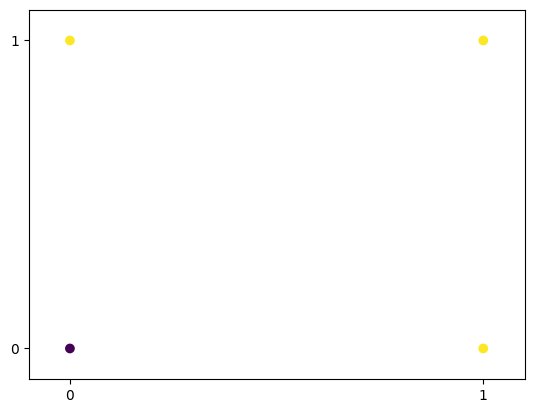

In [108]:
fig,ax = plt.subplots()

ax.scatter(dados.x1, dados.x2, c=dados.y)

ax.set(xlim=[-0.1,1.1], xticks=[0,1],
       ylim=[-0.1,1.1], yticks=[0,1])

plt.show()

In [109]:
# Criacao do classificador
clf = Perceptron(tol=1e-3, random_state=0, eta0=0.1)

In [110]:
X = dados[["x1", "x2"]]
y = dados.y

In [111]:
clf = clf.fit(X, y)

In [112]:
y_pred = clf.predict(X)
y_pred

array([0, 1, 1, 1])

In [113]:
confusion_matrix(y_pred, y)

array([[1, 0],
       [0, 3]])

In [114]:
w1 = round(clf.coef_[0][0], 2)
w2 = round(clf.coef_[0][1], 2)
w0 = clf.intercept_[0]
print(w1,w2,w0)

0.2 0.2 -0.1


In [115]:
import numpy as np

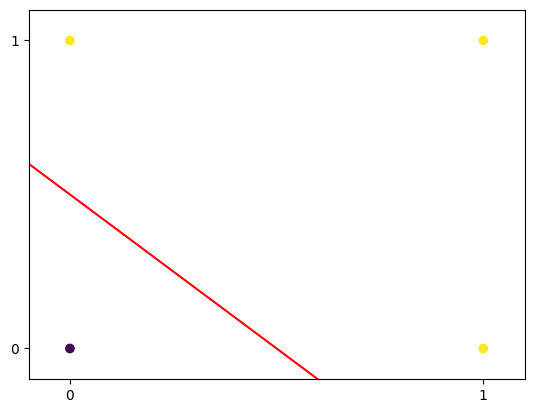

In [116]:
fig, ax = plt.subplots()

# Criando array de x
x_perc = np.linspace(-0.1,1,100)

#Calc y
y_perc = (-w1*x_perc-w0)/w2

ax.scatter(dados.x1, dados.x2, c=dados.y)
ax.plot(x_perc, y_perc, 'r')

ax.set(xlim=[-0.1,1.1], xticks=[0,1],
       ylim=[-0.1,1.1], yticks=[0,1])

plt.show()

Para OU Exclusivo, mudar o valor de y na tabela de dados

OU Exclusivo não é possivel com o Perceptron, não é linearmente separavel

Apenas um Perceptron não era possível resolver esse problema simples